2948 215.70963364993216


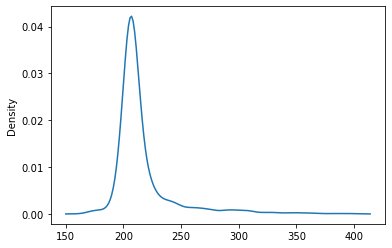

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

latency = np.loadtxt('../topic_test/latency_dist.txt')
latency = np.extract(latency<400, latency)

print(latency.shape[0], np.average(latency))
sns.distplot(latency, hist=False)

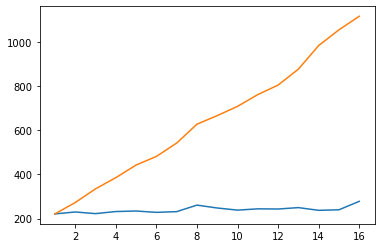

In [8]:
import numpy as np
import matplotlib.pyplot as plot

lat = np.loadtxt('../topic_test/latency.txt')
n = np.arange(1, 17)

plt.plot(n, lat[:,0])
plt.plot(n, lat[:,1])
plt.show()

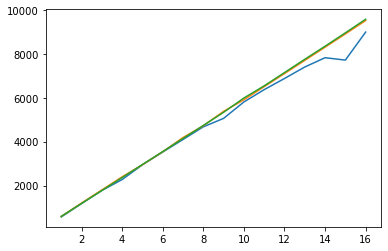

In [4]:
import numpy as np
import matplotlib.pyplot as plt

t1 = np.loadtxt('../topic_test/throughput_1ms.txt')
t10 = np.loadtxt('../topic_test/throughput_10ms.txt')
t100 = np.loadtxt('../topic_test/throughput_100ms.txt')
t1 = t1 / 100
t10 = t10 / 10
n = np.arange(1, 17)

plt.plot(n, t1)
plt.plot(n, t10)
plt.plot(n, t100)
plt.show()

9905 284.115598182736


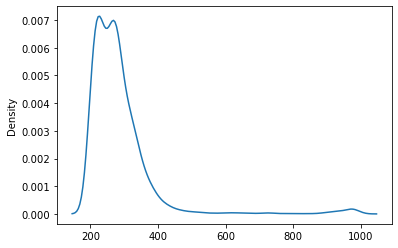

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rtt = np.loadtxt('../service_test/rtt_dist.txt')
rtt = np.extract(rtt<1000, rtt)

print(rtt.shape[0], np.average(rtt))
sns.distplot(rtt, hist=False)

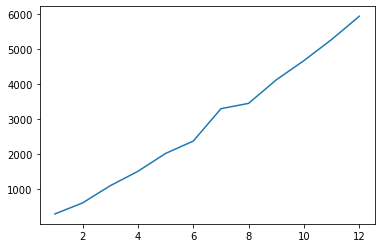

In [4]:
import numpy as np
import matplotlib.pyplot as plt

rtt = np.loadtxt('../service_test/rtt.txt')
n = np.arange(1, rtt.shape[0]+1)

plt.plot(n, rtt)
plt.show()

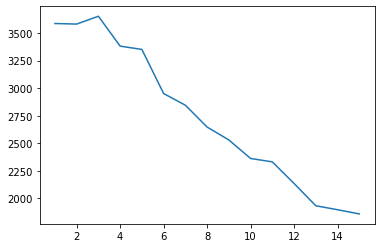

In [7]:
import numpy as np
import matplotlib.pyplot as plt

throughput = np.loadtxt('../service_test/throughput.txt')
n = np.arange(1, throughput.shape[0]+1)

plt.plot(n, throughput)
plt.show()